# Лаборатораня работа №2: Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

## 1) Обработка пропусков в данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [2]:
data = pd.read_csv('crimes.csv')

In [3]:
data.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,NaN,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,NaN,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,NaN,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285807 entries, 0 to 285806
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        285807 non-null  object 
 1   CrimeTime        285807 non-null  object 
 2   CrimeCode        285807 non-null  object 
 3   Location         284184 non-null  object 
 4   Description      285807 non-null  object 
 5   Inside/Outside   281611 non-null  object 
 6   Weapon           97396 non-null   object 
 7   Post             285616 non-null  float64
 8   District         285749 non-null  object 
 9   Neighborhood     284106 non-null  object 
 10  Location 1       284188 non-null  object 
 11  Total Incidents  285807 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 26.2+ MB


In [5]:
bad_cols = []
for col in data.columns:
    if data[col].isnull().sum():
        bad_cols.append(col)
    print(f'{col}: {data[col].isnull().sum()} ({round(data[col].isnull().sum() / data.shape[0] * 100, 3)}%)')
print('\nbad columns:', bad_cols)

CrimeDate: 0 (0.0%)
CrimeTime: 0 (0.0%)
CrimeCode: 0 (0.0%)
Location: 1623 (0.568%)
Description: 0 (0.0%)
Inside/Outside: 4196 (1.468%)
Weapon: 188411 (65.922%)
Post: 191 (0.067%)
District: 58 (0.02%)
Neighborhood: 1701 (0.595%)
Location 1: 1619 (0.566%)
Total Incidents: 0 (0.0%)

bad columns: ['Location', 'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood', 'Location 1']


In [6]:
print("Количество уникальных значений\n")
for col in data.columns:
    print(f'{col}: {data[col].unique().size}')

Количество уникальных значений

CrimeDate: 2143
CrimeTime: 4236
CrimeCode: 81
Location: 25950
Description: 15
Inside/Outside: 5
Weapon: 5
Post: 190
District: 14
Neighborhood: 281
Location 1: 97952
Total Incidents: 1


In [7]:
data.drop(['Total Incidents', 'Weapon'], axis=1, inplace=True) # малоинформативные столбцы
data.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Post,District,Neighborhood,Location 1
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)"
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)"
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)"
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)"
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)"


In [8]:
data['Inside/Outside'].unique()

array(['O', 'I', 'Outside', 'Inside', nan], dtype=object)

In [9]:
data['Inside/Outside'].replace('I', 'Inside', inplace=True)
data['Inside/Outside'].replace('O', 'Outside', inplace=True)
data['Inside/Outside'].unique()

array(['Outside', 'Inside', nan], dtype=object)

In [10]:
data['Inside/Outside'].value_counts()

Inside     142531
Outside    139080
Name: Inside/Outside, dtype: int64

In [11]:
data['Post'].value_counts()

111.0    9776
212.0    4982
922.0    4655
211.0    4513
913.0    4470
         ... 
2.1         1
925.0       1
0.7         1
0.6         1
1.0         1
Name: Post, Length: 189, dtype: int64

In [12]:
data['District'].value_counts()

NORTHEASTERN    44832
SOUTHEASTERN    39245
CENTRAL         33782
SOUTHERN        33031
NORTHERN        32005
NORTHWESTERN    28690
SOUTHWESTERN    26242
EASTERN         24168
WESTERN         23266
NORTHESTERN       280
SOUTHESTERN       205
Central             2
Gay Street          1
Name: District, dtype: int64

In [13]:
data['Neighborhood'].value_counts()

Downtown                   9666
Frankford                  6791
Belair-Edison              6133
Brooklyn                   4528
Cherry Hill                4273
                           ... 
Mt Pleasant Park             12
Blythewood                    5
EASTERN                       1
Dundalk Marine Terminal       1
NORTHEASTERN                  1
Name: Neighborhood, Length: 280, dtype: int64

In [14]:
data = data.dropna(subset=['Location 1'], axis=0)

x = [float(elem[1:14]) for elem in data['Location 1']]
y = [float(elem[17:30]) for elem in data['Location 1']]
data['X'] = pd.Series(x).reindex(data.index, method='ffill')
data['Y'] = pd.Series(y).reindex(data.index, method='ffill')

data.drop(['Location 1'], axis=1, inplace=True)

In [15]:
def show_coords_dist():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(data=data['X'], ax=ax1);
    sns.boxplot(data=data['Y'], ax=ax2);
    ax1.set_title('X coord')
    ax2.set_title('Y coord')
    plt.show()

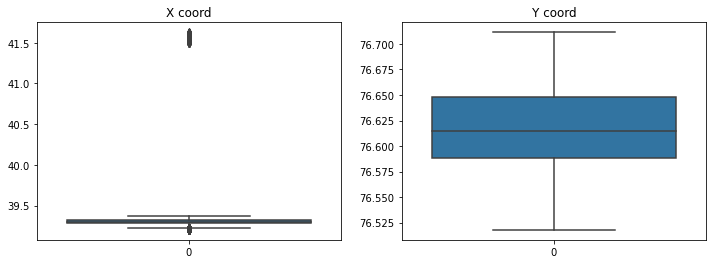

In [16]:
show_coords_dist()

In [17]:
data.drop(data[data['X'] > 40].index, inplace=True)

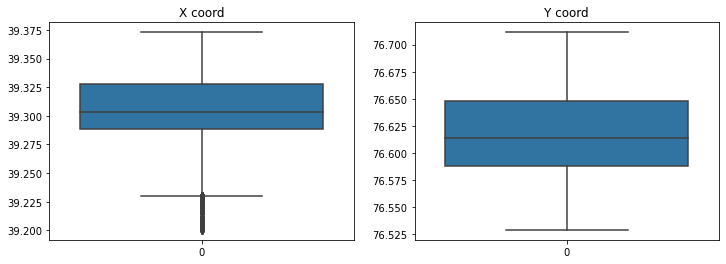

In [18]:
show_coords_dist()

In [19]:
SimpleImputer(strategy='constant', fill_value='-', copy=False).fit_transform(data['Location'].values.reshape(-1, 1))
SimpleImputer(strategy='constant', fill_value='-', copy=False).fit_transform(data['Neighborhood'].values.reshape(-1, 1))
SimpleImputer(strategy='constant', fill_value='Inside', copy=False).fit_transform(data['Inside/Outside'].values.reshape(-1, 1))

data = data.dropna(subset=['Post'], axis=0)
data = data.dropna(subset=['District'], axis=0)
data = data.dropna(subset=['X'], axis=0)
data = data.dropna(subset=['Y'], axis=0)

In [20]:
data.isnull().sum()

CrimeDate         0
CrimeTime         0
CrimeCode         0
Location          0
Description       0
Inside/Outside    0
Post              0
District          0
Neighborhood      0
X                 0
Y                 0
dtype: int64

## 2) Кодирование категориальных признаков

In [21]:
data.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Post,District,Neighborhood,X,Y
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,Outside,111.0,CENTRAL,Downtown,39.29241,76.61408
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,Inside,213.0,SOUTHEASTERN,Fells Point,39.28242,76.59288
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,Outside,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,39.34805,76.58834
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,Outside,424.0,NORTHEASTERN,Westfield,39.36263,76.55161
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,Outside,111.0,CENTRAL,Downtown,39.28938,76.61971


In [22]:
data['Hours'] = [int(elem[:2]) for elem in data['CrimeTime']]
data['Minutes'] = [int(elem[3:5]) for elem in data['CrimeTime']]
data.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Post,District,Neighborhood,X,Y,Hours,Minutes
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,Outside,111.0,CENTRAL,Downtown,39.29241,76.61408,2,35
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,Inside,213.0,SOUTHEASTERN,Fells Point,39.28242,76.59288,2,56
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,Outside,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,39.34805,76.58834,3,0
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,Outside,424.0,NORTHEASTERN,Westfield,39.36263,76.55161,3,0
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,Outside,111.0,CENTRAL,Downtown,39.28938,76.61971,3,0


In [23]:
category_cols = ['CrimeCode', 'Location', 'Description', 'Inside/Outside', 'District', 'Neighborhood']

In [24]:
print("Количество уникальных значений\n")
for col in category_cols:
    print(f'{col}: {data[col].unique().size}')

Количество уникальных значений

CrimeCode: 81
Location: 25937
Description: 15
Inside/Outside: 2
District: 12
Neighborhood: 281


In [25]:
category_cols.remove('Location')
category_cols.remove('Neighborhood')

In [26]:
for col in category_cols:
    data = pd.concat([data, pd.get_dummies(data[col])], axis=1)

In [27]:
data.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Post,District,Neighborhood,X,...,Gay Street,NORTHEASTERN,NORTHERN,NORTHESTERN,NORTHWESTERN,SOUTHEASTERN,SOUTHERN,SOUTHESTERN,SOUTHWESTERN,WESTERN
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,Outside,111.0,CENTRAL,Downtown,39.29241,...,0,0,0,0,0,0,0,0,0,0
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,Inside,213.0,SOUTHEASTERN,Fells Point,39.28242,...,0,0,0,0,0,1,0,0,0,0
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,Outside,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,39.34805,...,0,1,0,0,0,0,0,0,0,0
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,Outside,424.0,NORTHEASTERN,Westfield,39.36263,...,0,1,0,0,0,0,0,0,0,0
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,Outside,111.0,CENTRAL,Downtown,39.28938,...,0,0,0,0,0,0,0,0,0,0


## Масштабирование данных

<AxesSubplot:xlabel='Post', ylabel='Count'>

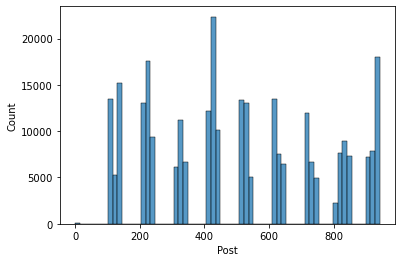

In [28]:
sns.histplot(data['Post'])

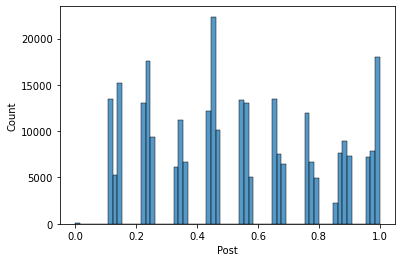

In [29]:
data['Post'] = MinMaxScaler().fit_transform(data['Post'].values.reshape(-1, 1))
sns.histplot(data['Post']);

In [30]:
data['Hours'] = MinMaxScaler().fit_transform(data['Hours'].values.reshape(-1, 1))
data['Minutes'] = MinMaxScaler().fit_transform(data['Minutes'].values.reshape(-1, 1))
data['X'] = MinMaxScaler().fit_transform(data['X'].values.reshape(-1, 1))
data['Y'] = MinMaxScaler().fit_transform(data['Y'].values.reshape(-1, 1))

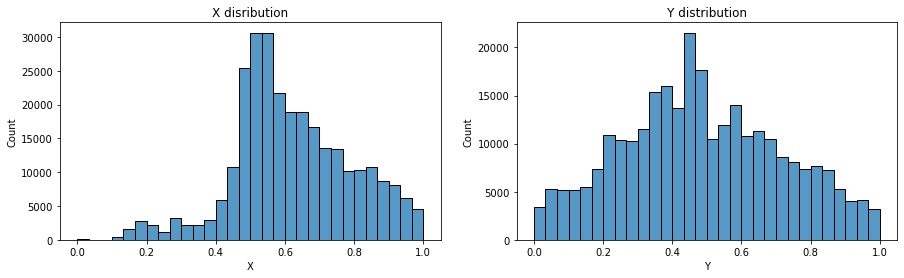

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(data['X'], ax=ax1, bins=30)
sns.histplot(data['Y'], ax=ax2, bins=30)
ax1.set_title('X disribution')
ax2.set_title('Y distribution')
plt.show()

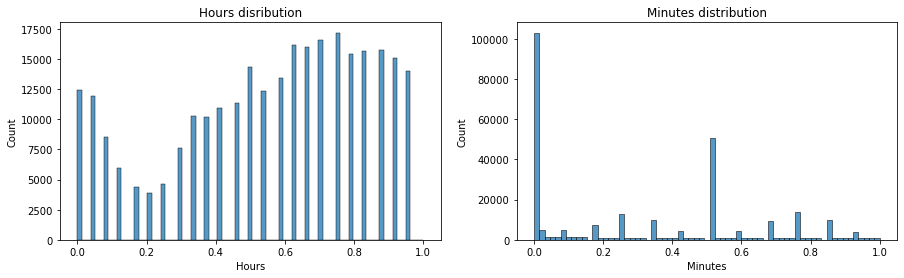

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(data['Hours'], ax=ax1)
sns.histplot(data['Minutes'], ax=ax2)
ax1.set_title('Hours disribution')
ax2.set_title('Minutes distribution')
plt.show()